In [3]:
from visualizer.data import PlotActivityContoursProcesser
from visualizer.plots import PlotActivityContoursPlot
import glob 
import os

c:\Users\Eesha\Documents\GitHub\testsima\Lib\site-packages\visualizer\misc.py:59: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Time(s)/Cell Status' in df_signals.values:
C:\Users\Eesha\AppData\Local\Temp\ipykernel_13768\3228468696.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
C:\Users\Eesha\AppData\Local\Temp\ipykernel_13768\3228468696.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig["contour"].show()
C:\Users\Eesha\AppData\Local\Temp\ipykernel_13768\3228468696.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig["linegraph"].show()
C:\Users\Eesha\AppData\Local\Temp\ipykernel_13768\32

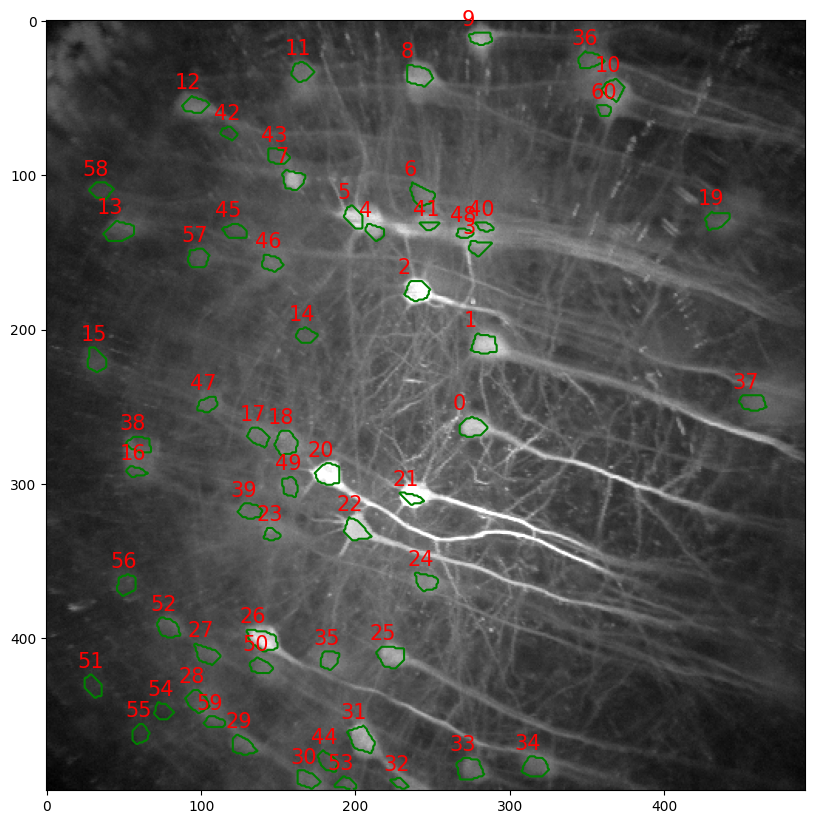

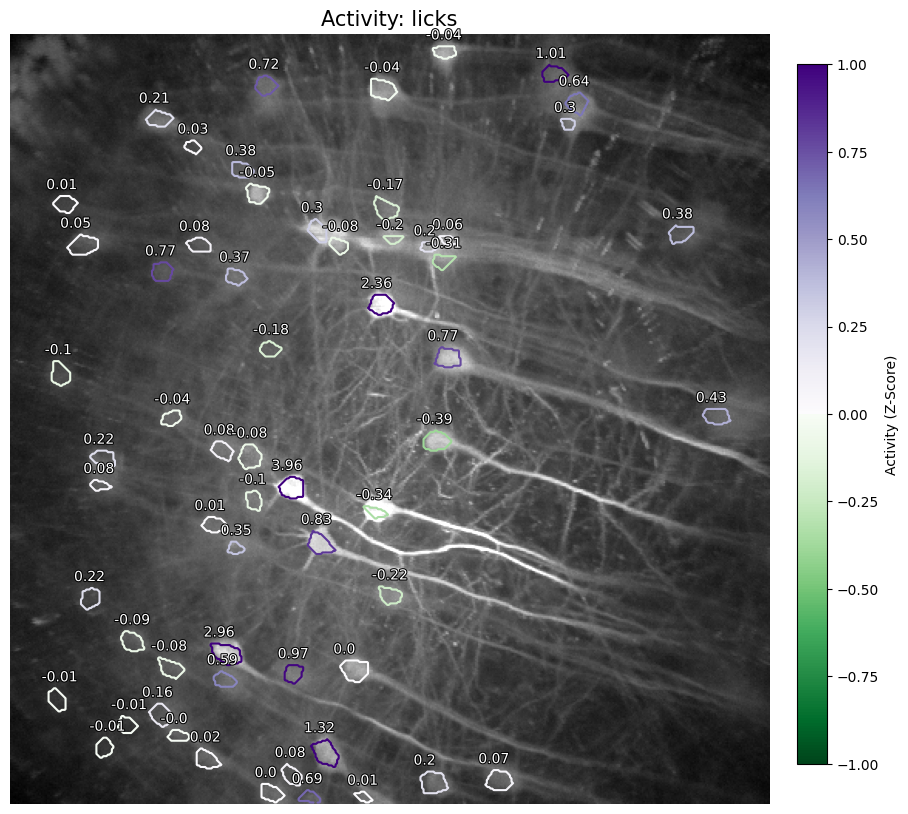

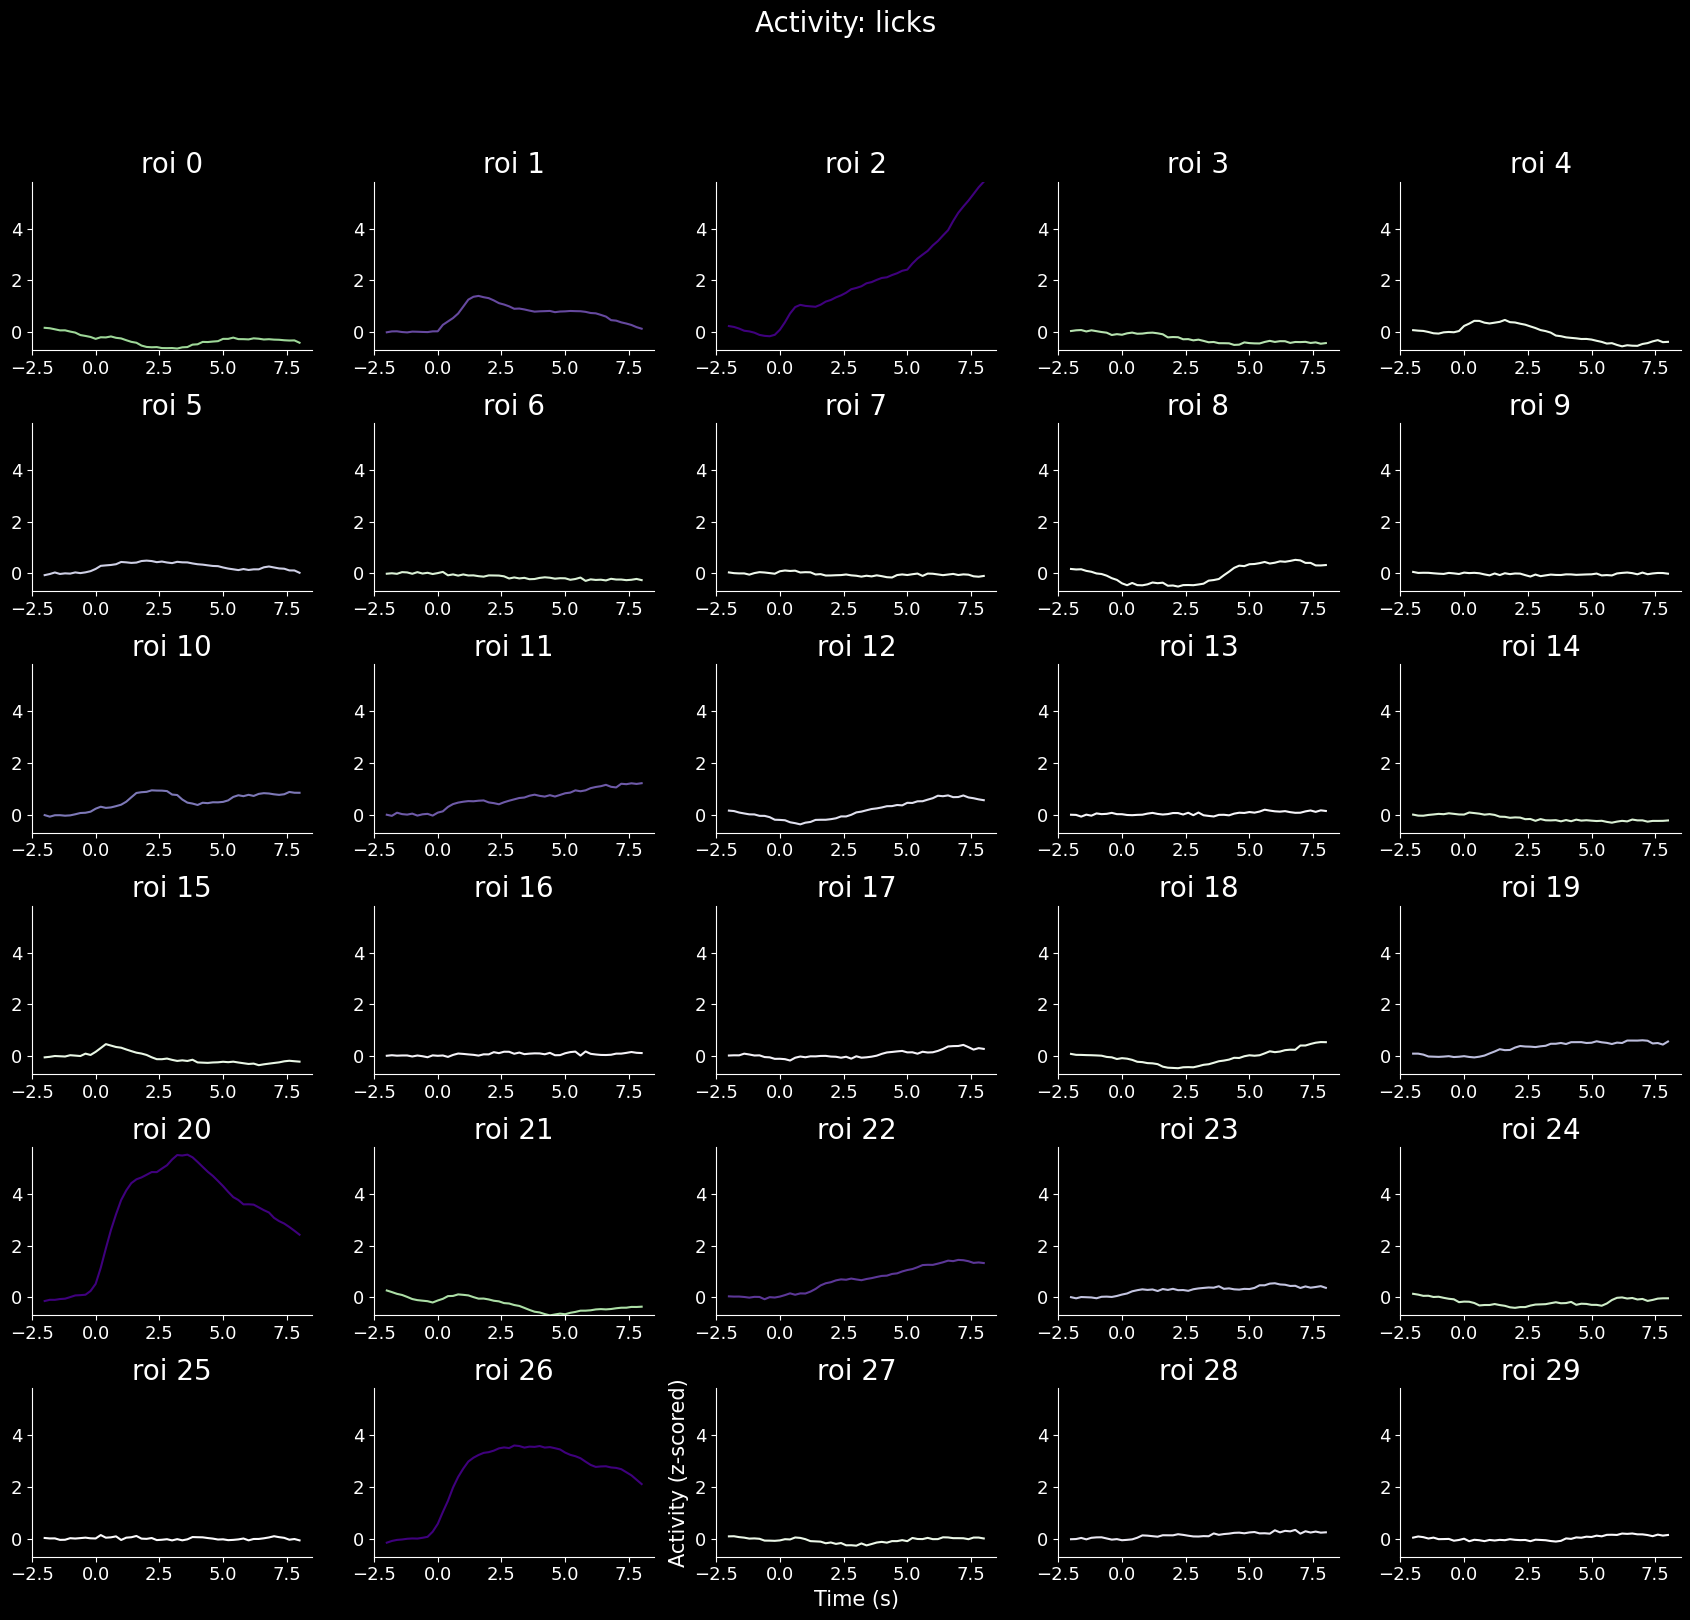

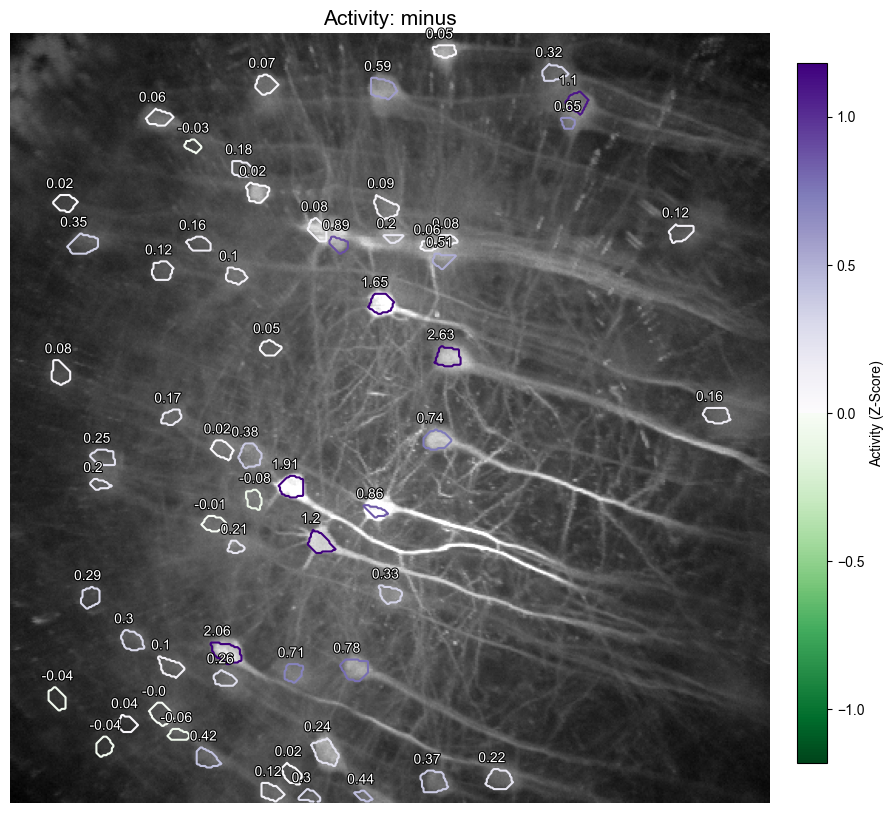

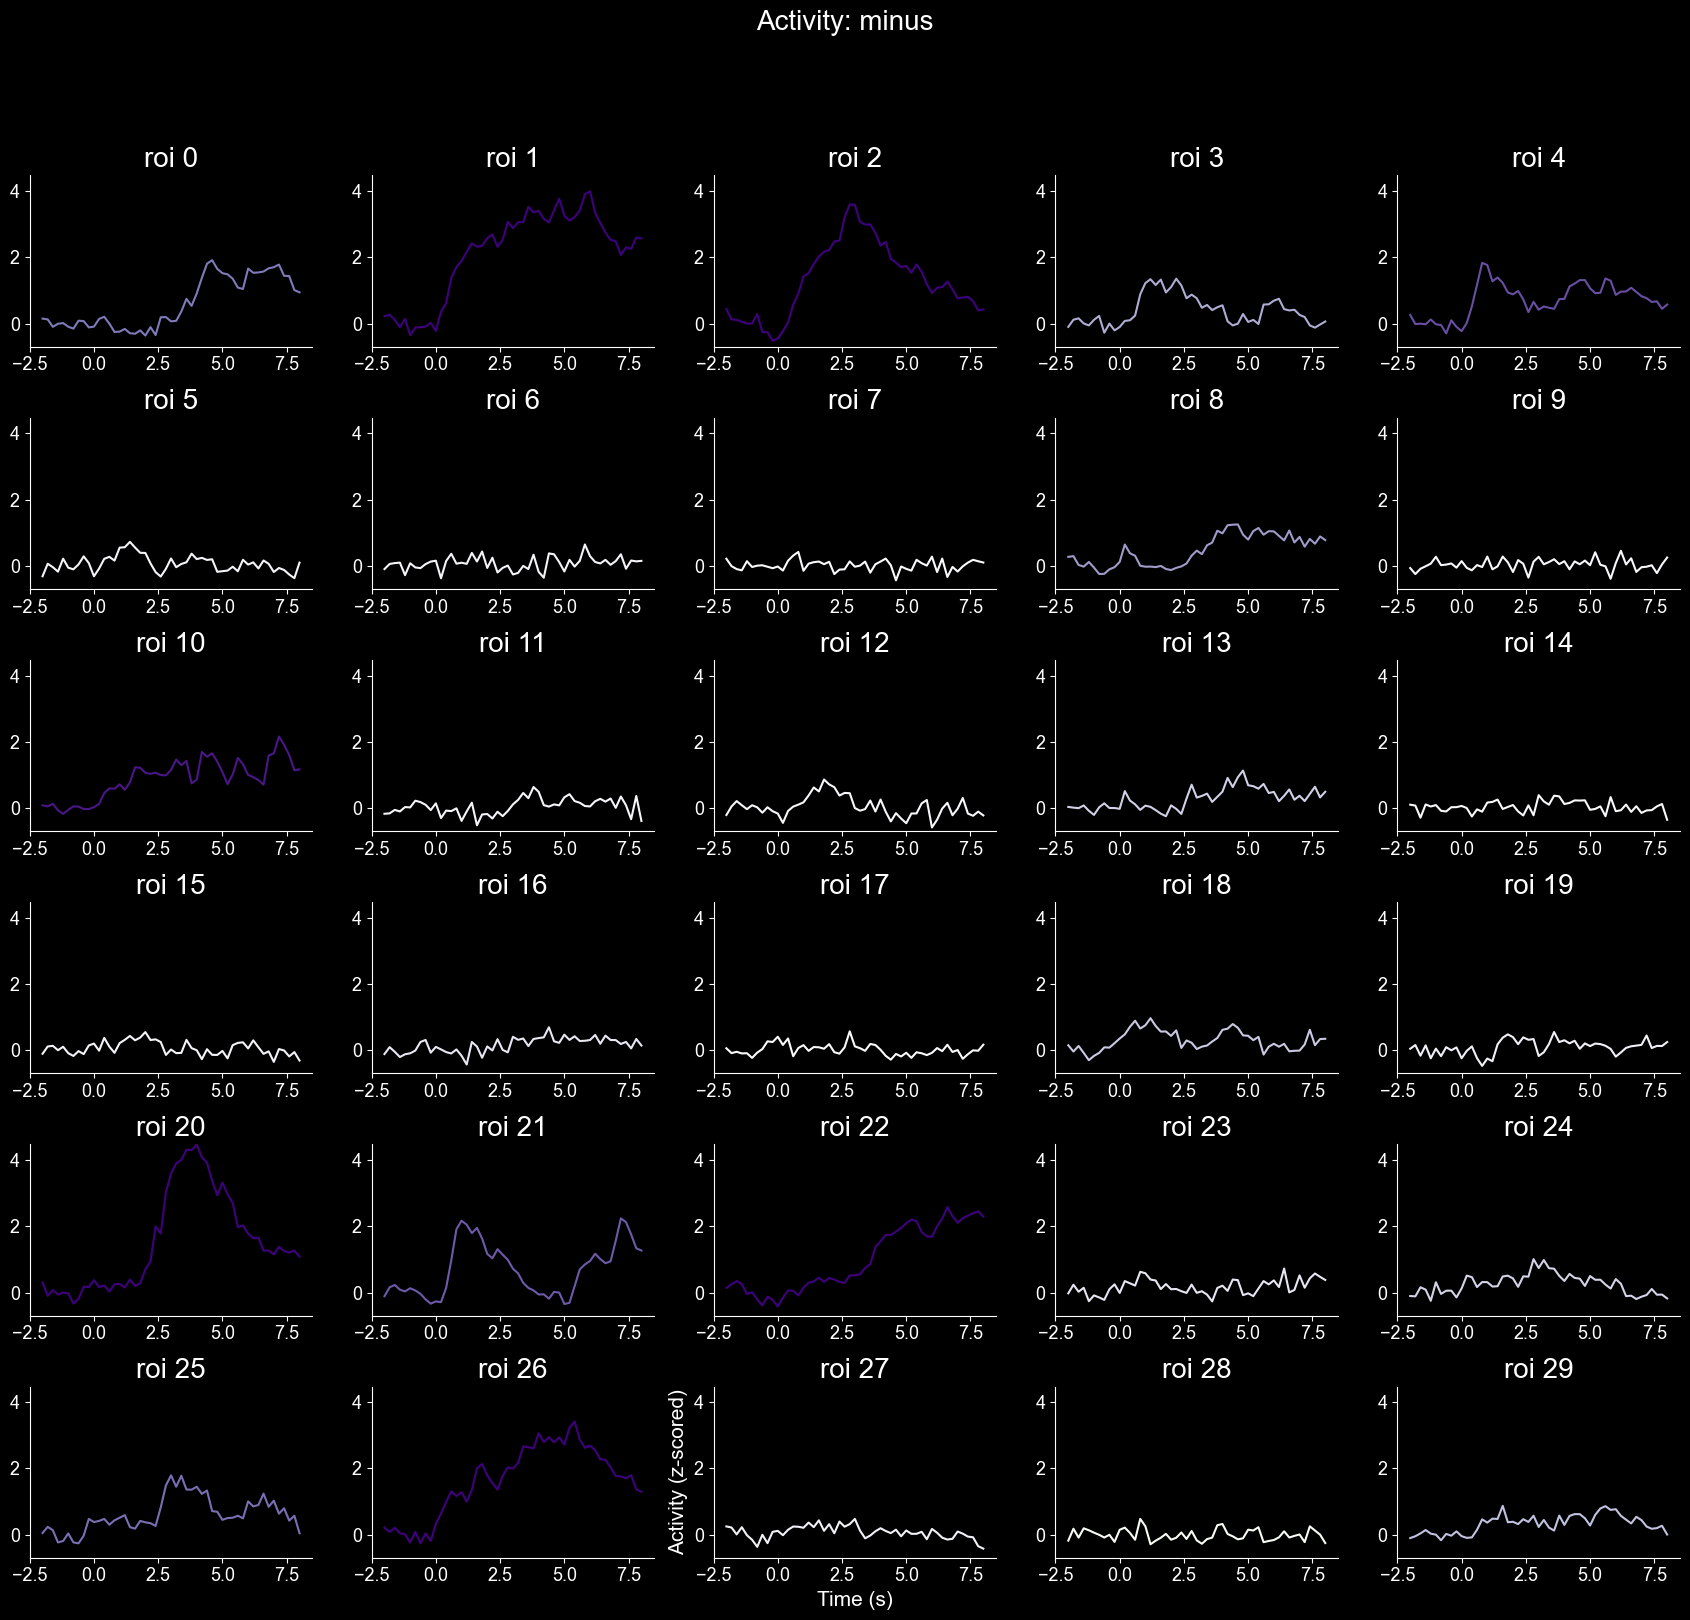

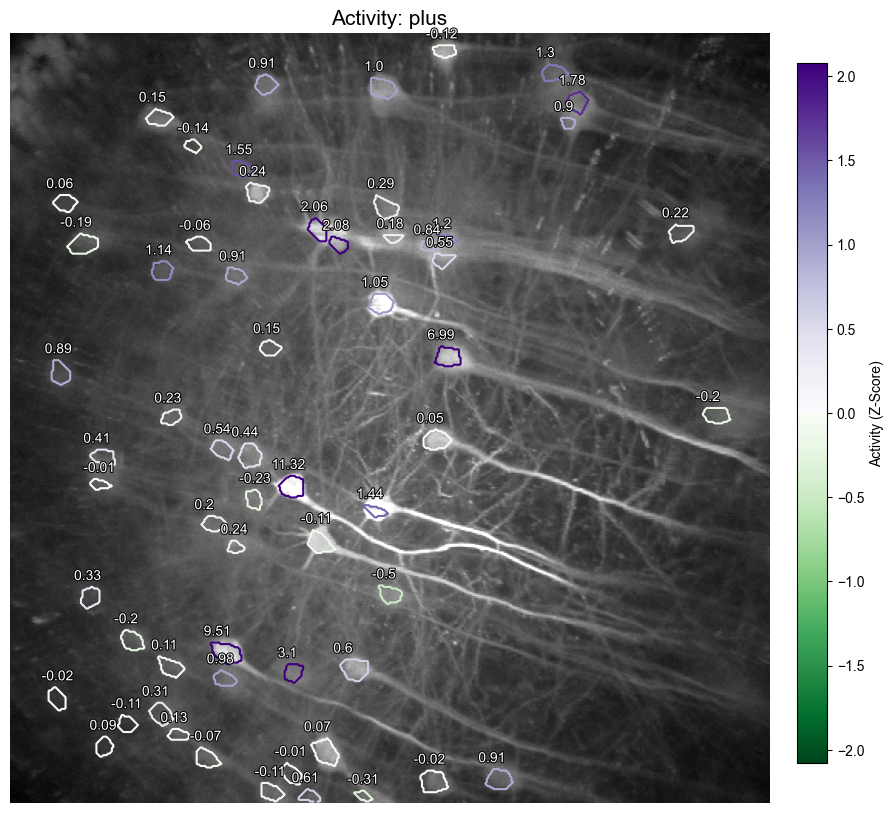

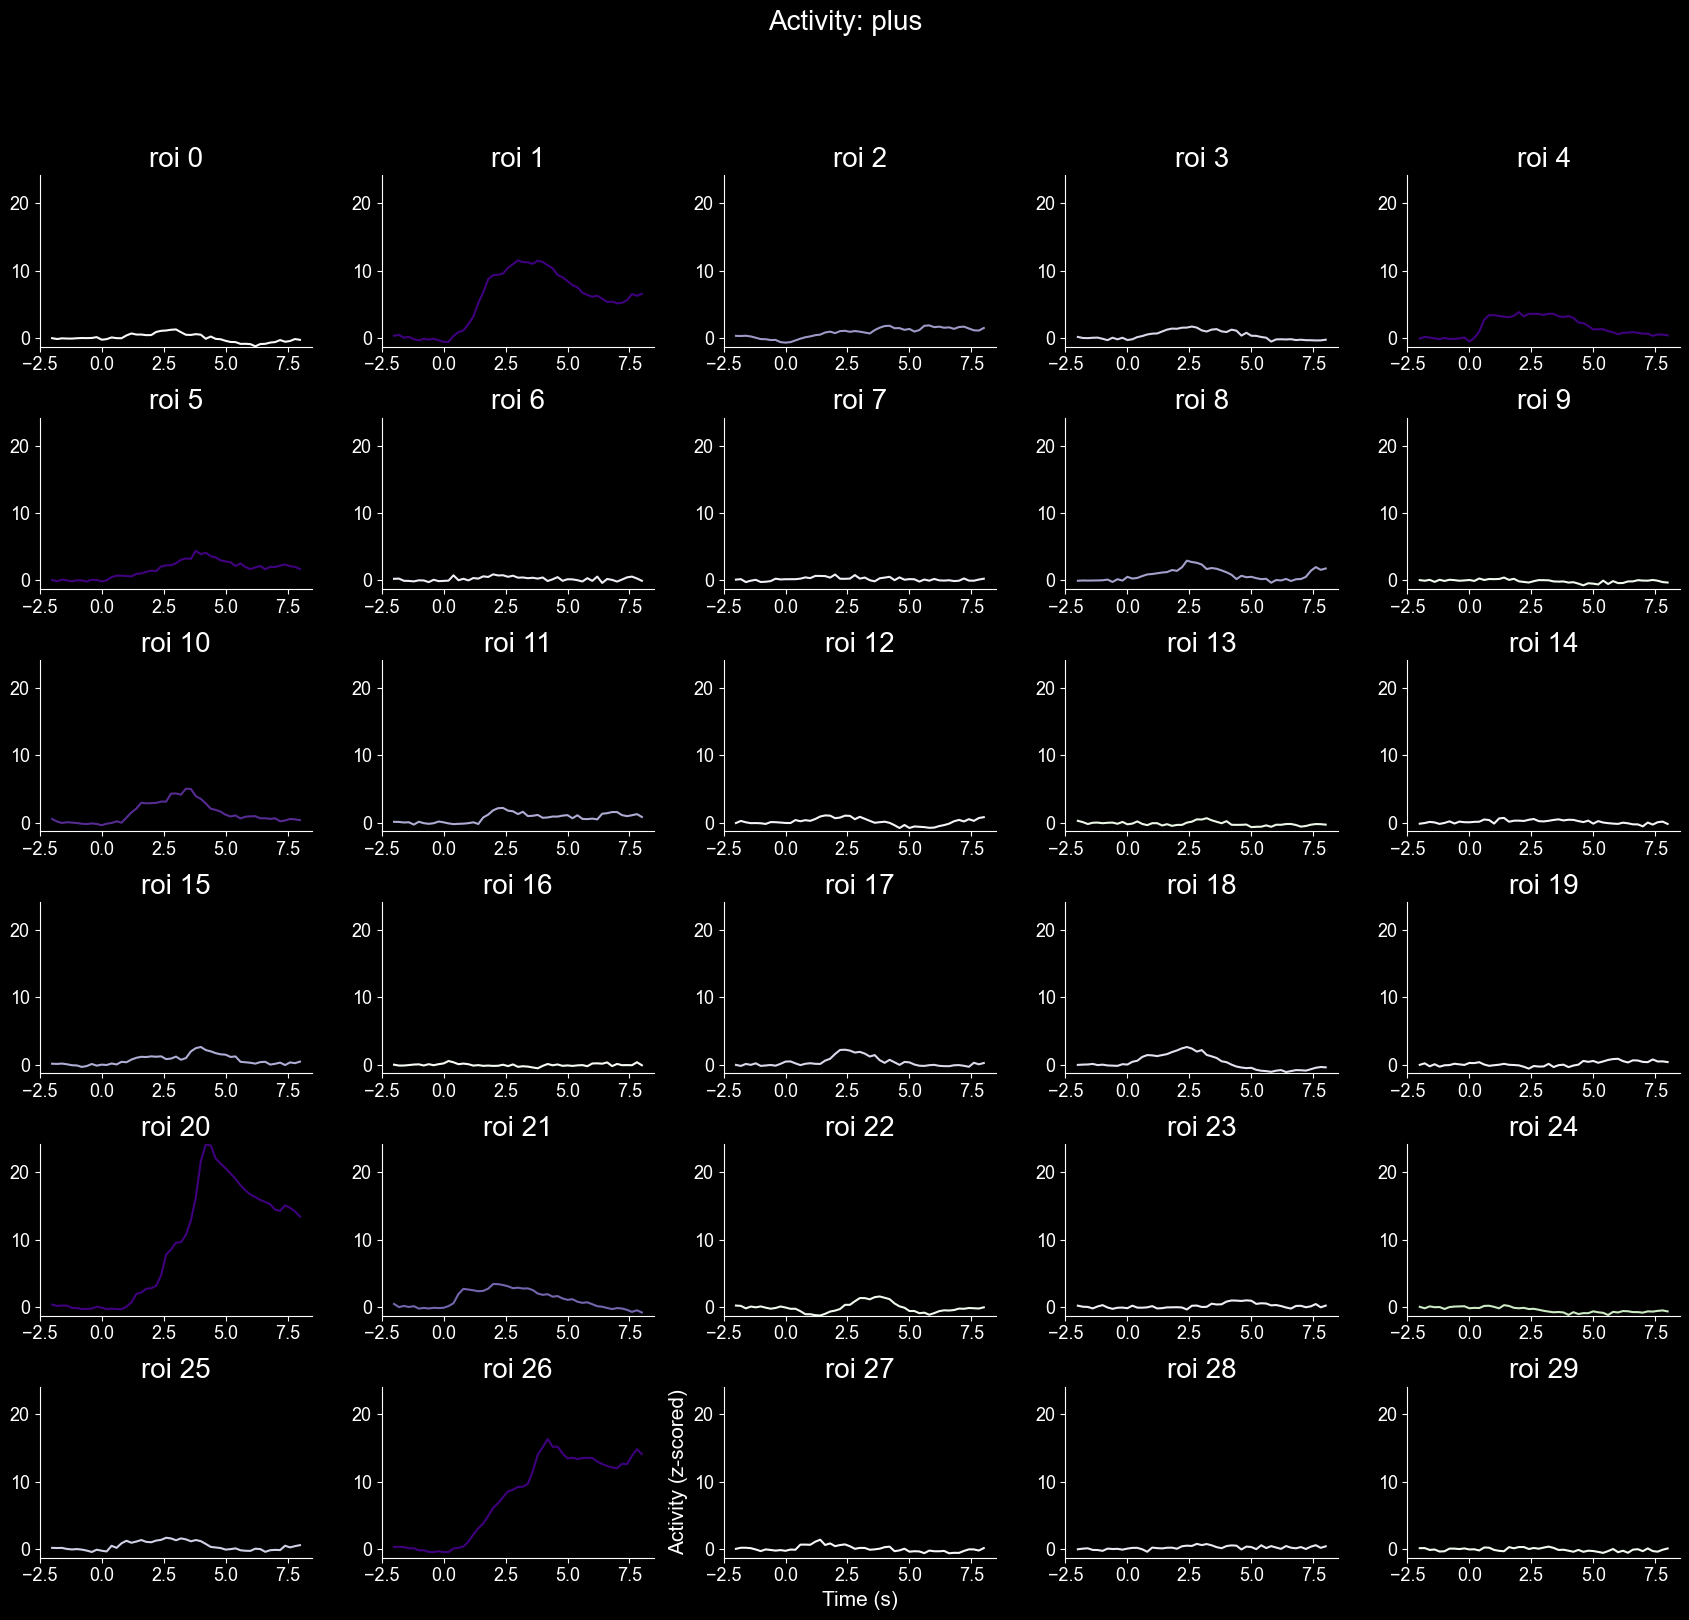

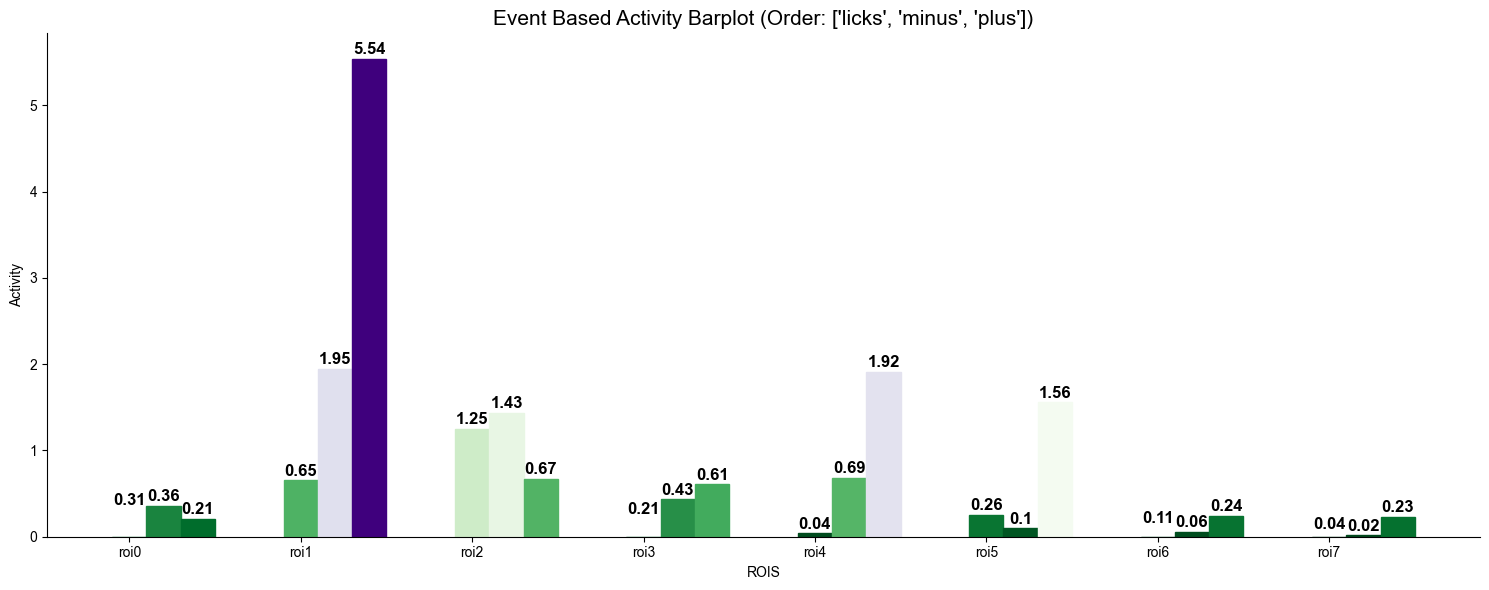

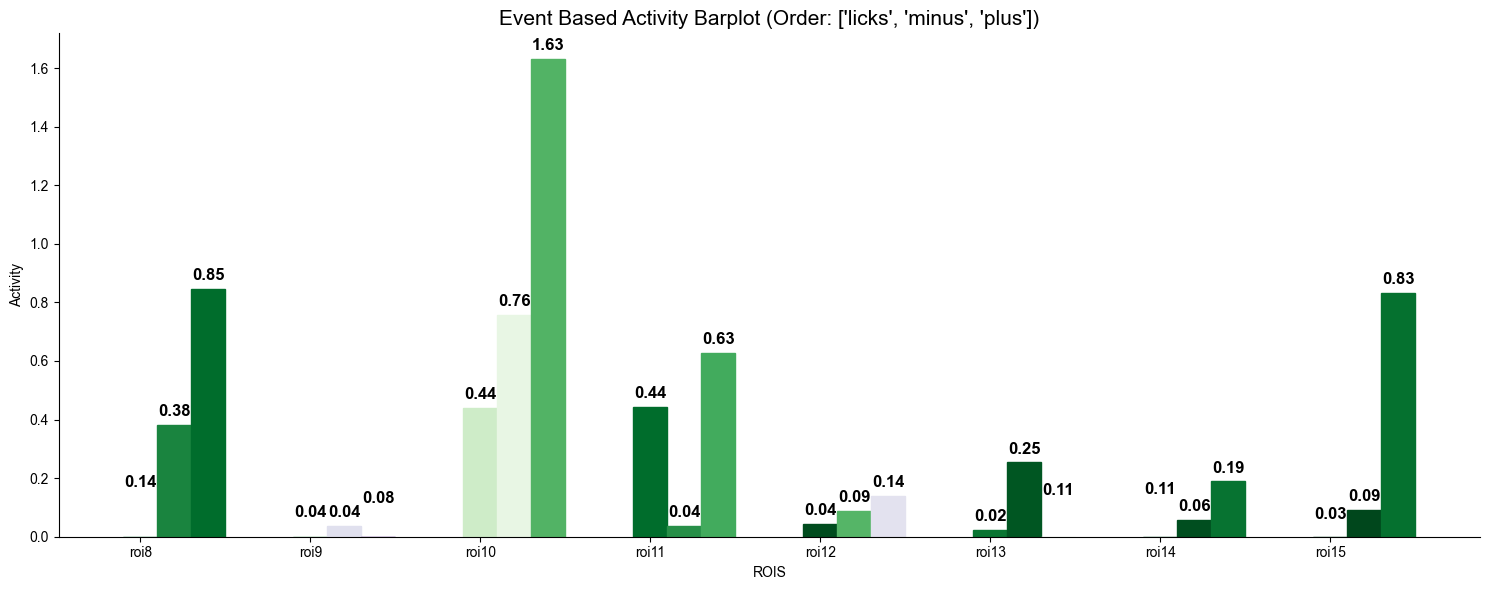

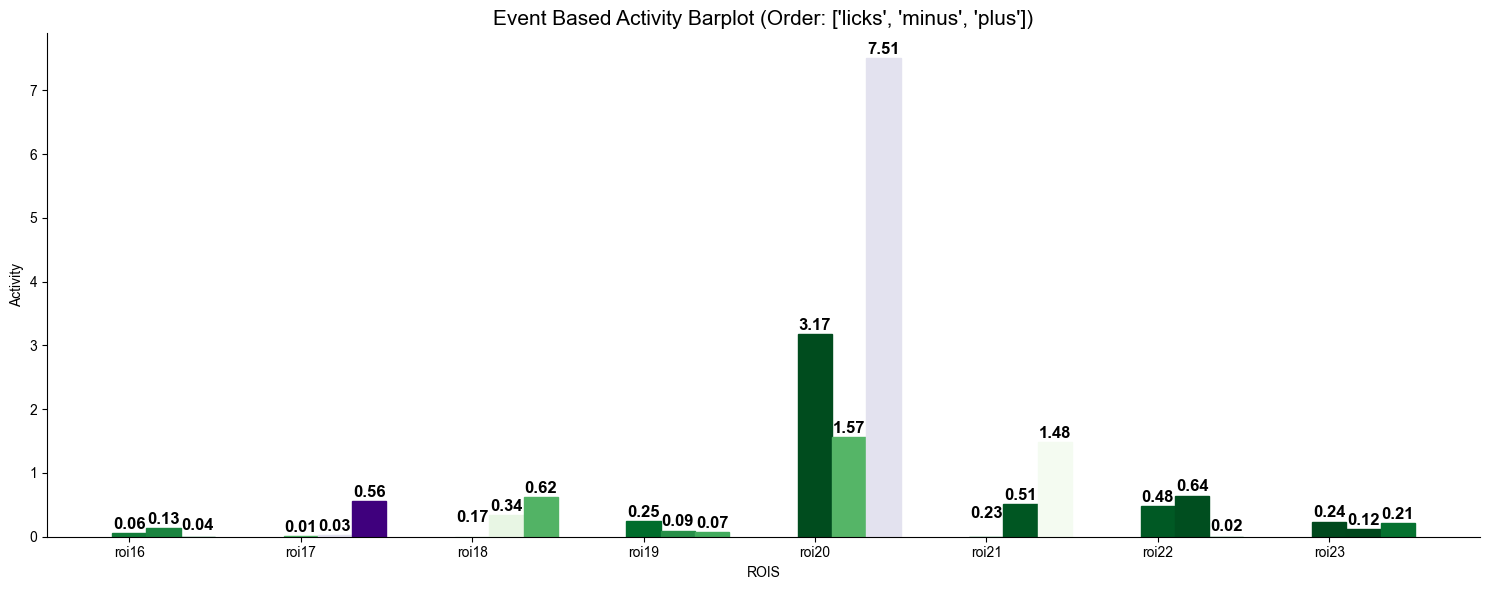

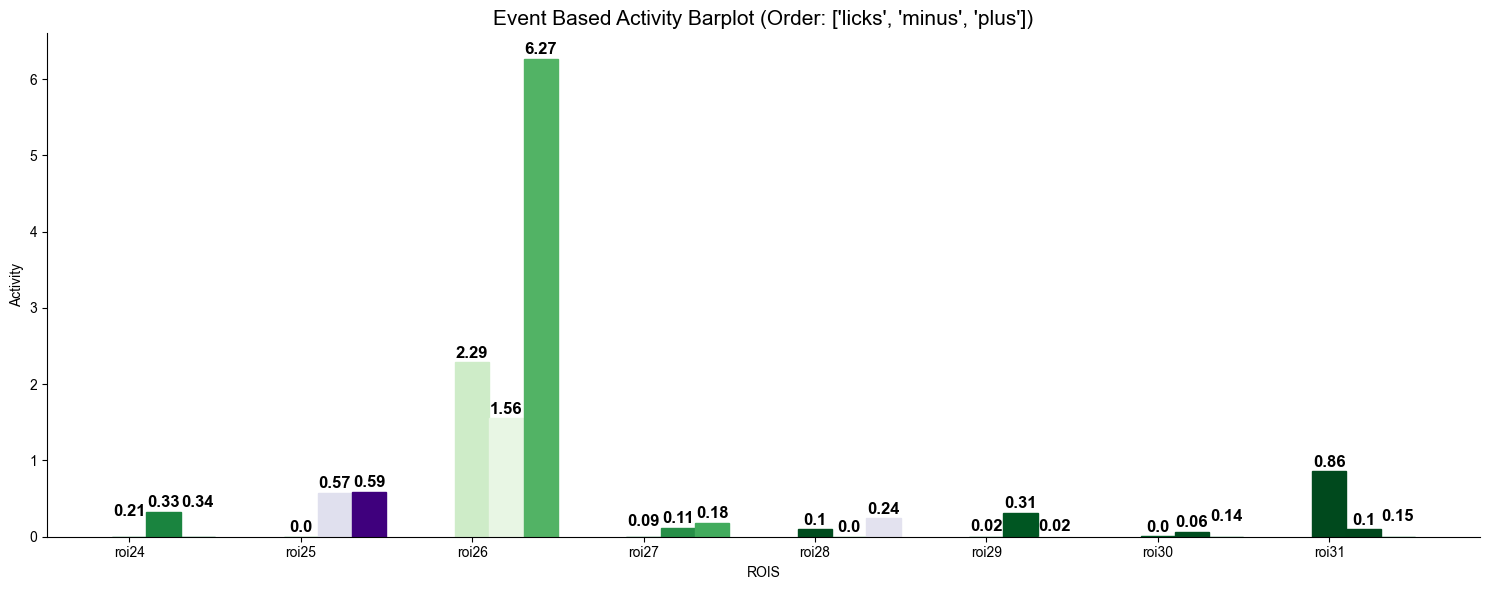

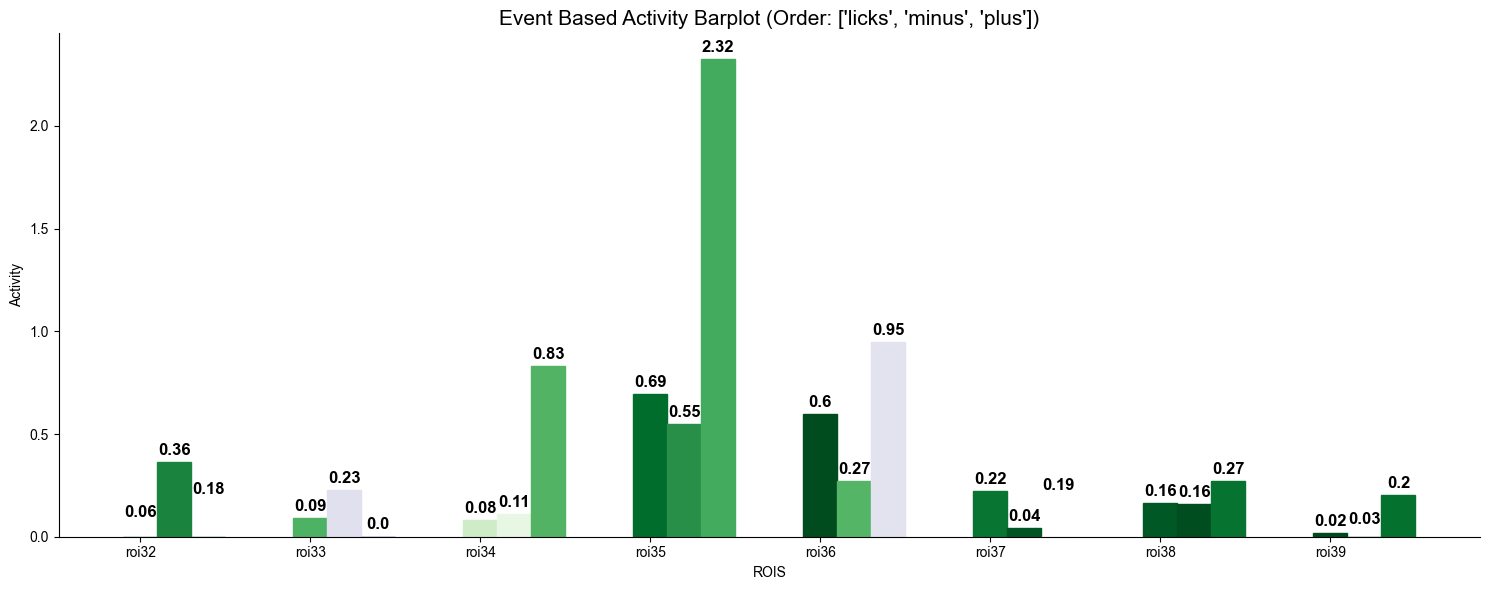

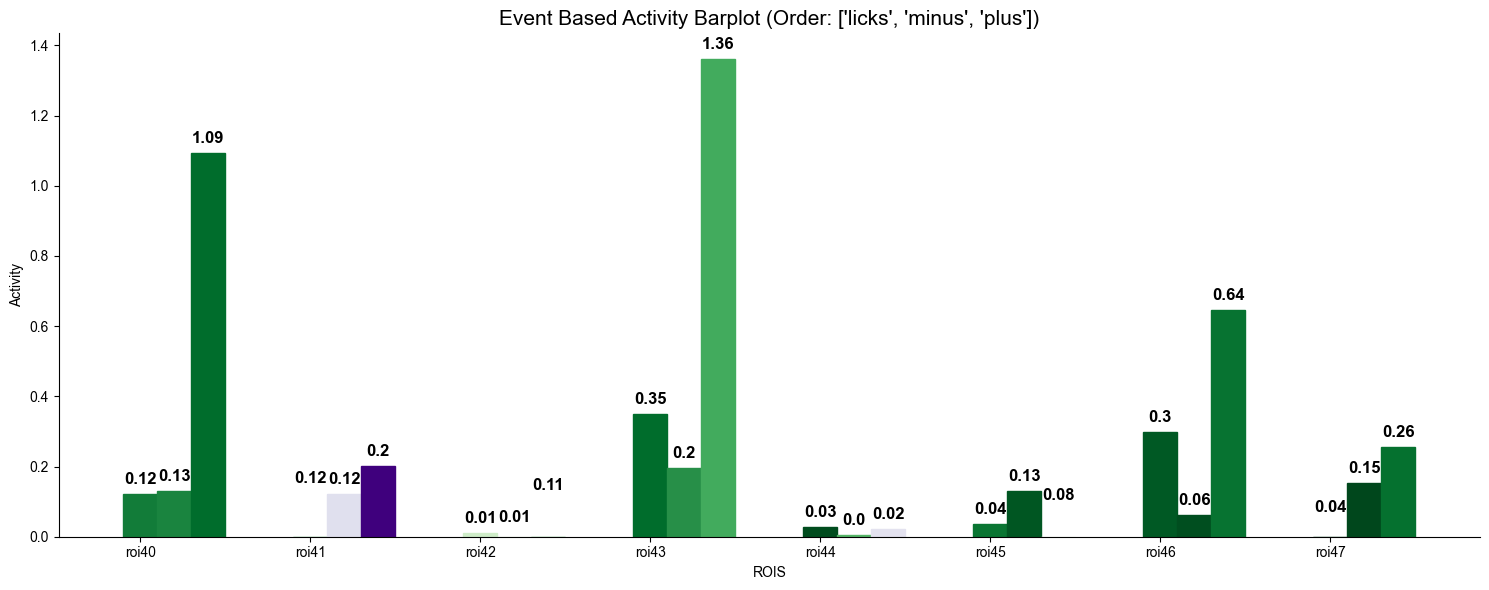

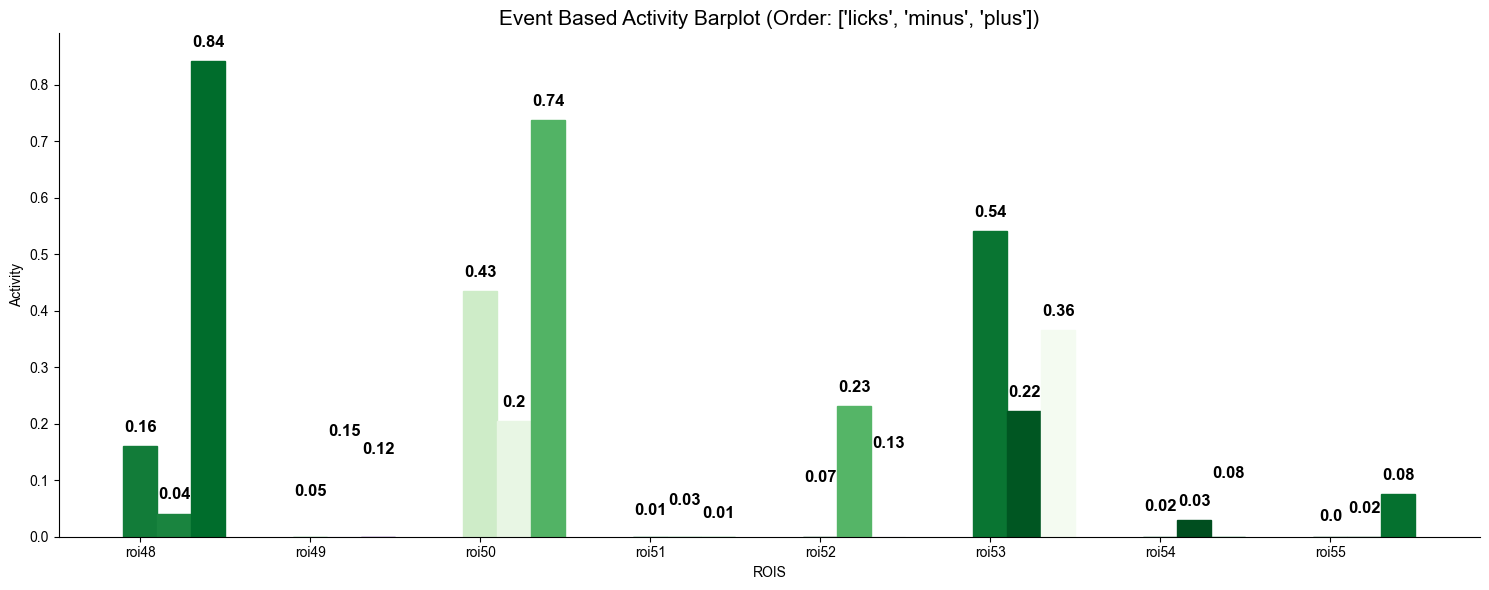

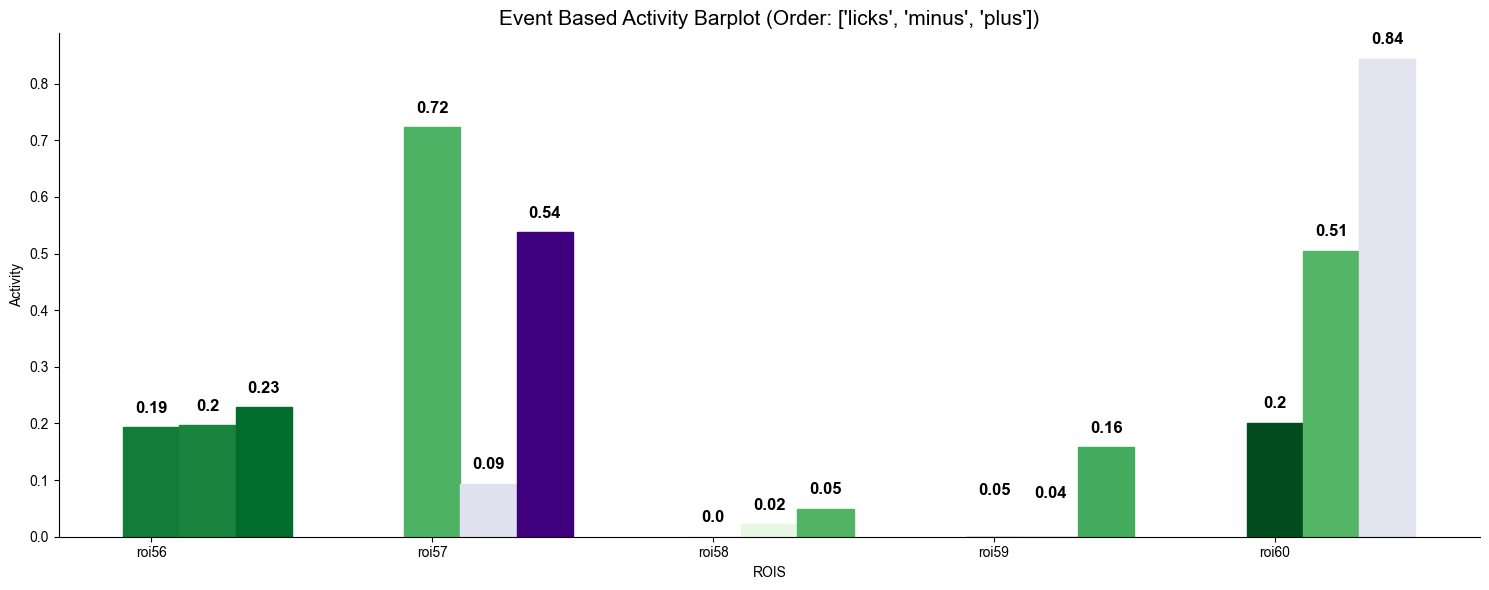

In [4]:
#fparams
fname_signal = 'VJ_OFCVTA_7_260_D6_neuropil_corrected_signals_15_50_beta_0.8.csv'
fname_events = 'event_times_VJ_OFCVTA_7_260_D6_trained.csv'
fdir = os.path.abspath('./sample_data/VJ_OFCVTA_7_260_D6') 

# user defined variables
analysis_win = [0, None]
raw_npilCorr = 1 # 0 for raw vs 1 neuropil corrected signal
fs = 5

rois_to_include = None
activity_name = True
trial_start_end = [-2, 8]
baseline_end = -0.2
selected_conditions = None
opto_blank_frame = False

#reading data from local files
signals_content = glob.glob(os.path.join(fdir, fname_signal))[0]
events_content = glob.glob(os.path.join(fdir, fname_events))[0]
simah5_content = glob.glob(os.path.join(fdir, 'VJ_OFCVTA_7_260_D6_sima_mc.h5'))[0]
sima_mask_content = os.path.join(fdir, 'VJ_OFCVTA_7_260_D6_sima_masks.npy')

def main():
    data_processor = PlotActivityContoursProcesser(signals_content, events_content, simah5_content, sima_mask_content, raw_npilCorr, fs, rois_to_include, analysis_win, activity_name, trial_start_end, baseline_end, selected_conditions, opto_blank_frame)
    data_processor.generate_all_data()

    data_plotter = PlotActivityContoursPlot(data_processor)
    fig1 = data_plotter.generate_contour_roi_plot()
    fig1.show()

    figs = data_plotter.generate_activityname_contours()
    for fig in figs:
        fig["contour"].show()
        fig["linegraph"].show()
        
    figs = data_plotter.generate_bar_graph()
    for fig in figs:
        fig.show()

if __name__ == "__main__":
    main()